# पीटर और भेड़िया: रिइनफोर्समेंट लर्निंग प्राइमर

इस ट्यूटोरियल में, हम यह सीखेंगे कि रिइनफोर्समेंट लर्निंग को पथ खोजने की समस्या पर कैसे लागू किया जाए। यह सेटिंग रूसी संगीतकार [सर्गेई प्रोकोफिएव](https://en.wikipedia.org/wiki/Sergei_Prokofiev) की संगीत परी कथा [पीटर और भेड़िया](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) से प्रेरित है। यह कहानी एक युवा पायनियर पीटर की है, जो साहसपूर्वक अपने घर से बाहर जंगल के खुले क्षेत्र में भेड़िये का पीछा करने जाता है। हम मशीन लर्निंग एल्गोरिदम को प्रशिक्षित करेंगे, जो पीटर को आसपास के क्षेत्र का पता लगाने और एक आदर्श नेविगेशन मानचित्र बनाने में मदद करेंगे।

सबसे पहले, चलिए कुछ उपयोगी लाइब्रेरीज़ इंपोर्ट करते हैं:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## सुदृढीकरण शिक्षण का अवलोकन

**सुदृढीकरण शिक्षण** (RL) एक शिक्षण तकनीक है जो हमें किसी **पर्यावरण** में एक **एजेंट** के इष्टतम व्यवहार को कई प्रयोगों के माध्यम से सीखने की अनुमति देती है। इस पर्यावरण में एजेंट का एक **लक्ष्य** होना चाहिए, जिसे एक **पुरस्कार फ़ंक्शन** द्वारा परिभाषित किया जाता है।

## पर्यावरण

सरलता के लिए, चलिए पीटर की दुनिया को `चौड़ाई` x `ऊंचाई` आकार के एक वर्ग बोर्ड के रूप में मानते हैं। इस बोर्ड की प्रत्येक सेल निम्नलिखित में से कोई एक हो सकती है:
* **जमीन**, जिस पर पीटर और अन्य जीव चल सकते हैं
* **पानी**, जिस पर आप स्पष्ट रूप से नहीं चल सकते
* **एक पेड़** या **घास** - एक जगह जहां आप आराम कर सकते हैं
* **एक सेब**, जो कुछ ऐसा है जिसे पीटर खुद को खिलाने के लिए पाकर खुश होगा
* **एक भेड़िया**, जो खतरनाक है और इससे बचना चाहिए

पर्यावरण के साथ काम करने के लिए, हम एक क्लास `Board` परिभाषित करेंगे। इस नोटबुक को बहुत अधिक जटिल न बनाने के लिए, हमने बोर्ड के साथ काम करने वाले सभी कोड को एक अलग `rlboard` मॉड्यूल में स्थानांतरित कर दिया है, जिसे हम अब आयात करेंगे। आप इस मॉड्यूल के अंदर देख सकते हैं ताकि कार्यान्वयन के आंतरिक विवरण के बारे में अधिक जानकारी प्राप्त कर सकें।


आइए अब एक यादृच्छिक बोर्ड बनाएं और देखें कि यह कैसा दिखता है:


In [4]:
# code block 1

## क्रियाएँ और नीति

हमारे उदाहरण में, पीटर का लक्ष्य एक सेब खोजना होगा, जबकि भेड़िये और अन्य बाधाओं से बचना होगा। इन क्रियाओं को एक डिक्शनरी के रूप में परिभाषित करें, और उन्हें संबंधित निर्देशांक परिवर्तनों के जोड़ों से जोड़ें।


In [5]:
# code block 2

हमारे एजेंट (पीटर) की रणनीति को एक **पॉलिसी** द्वारा परिभाषित किया गया है। चलिए सबसे सरल पॉलिसी, जिसे **रैंडम वॉक** कहा जाता है, पर विचार करते हैं।

## रैंडम वॉक

सबसे पहले, चलिए रैंडम वॉक रणनीति को लागू करके अपनी समस्या का समाधान करते हैं।


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## रिवॉर्ड फंक्शन

हमारी पॉलिसी को और अधिक स्मार्ट बनाने के लिए, हमें यह समझने की ज़रूरत है कि कौन से कदम "बेहतर" हैं दूसरों की तुलना में।


In [8]:
#code block 5

## क्यू-लर्निंग

एक क्यू-टेबल या बहु-आयामी ऐरे बनाएं। चूंकि हमारे बोर्ड का आकार `चौड़ाई` x `ऊंचाई` है, हम क्यू-टेबल को एक numpy ऐरे के रूप में दर्शा सकते हैं, जिसका आकार `चौड़ाई` x `ऊंचाई` x `len(actions)` होगा:


In [9]:
# code block 6

Q-तालिका को बोर्ड पर तालिका को देखने के लिए `plot` फ़ंक्शन में पास करें:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## क्यू-लर्निंग का सार: बेलमैन समीकरण और लर्निंग एल्गोरिदम

हमारे लर्निंग एल्गोरिदम के लिए एक छद्म-कोड लिखें:

* सभी राज्यों और क्रियाओं के लिए Q-टेबल Q को समान मानों से प्रारंभ करें
* लर्निंग दर $\alpha\leftarrow 1$ सेट करें
* सिमुलेशन को कई बार दोहराएं
   1. किसी भी रैंडम स्थिति से शुरू करें
   1. दोहराएं
        1. स्थिति $s$ पर एक क्रिया $a$ चुनें
        2. क्रिया को निष्पादित करें और एक नई स्थिति $s'$ पर जाएं
        3. यदि हम खेल समाप्ति की स्थिति पर पहुँचते हैं, या कुल इनाम बहुत कम हो जाता है - सिमुलेशन से बाहर निकलें  
        4. नई स्थिति पर इनाम $r$ की गणना करें
        5. बेलमैन समीकरण के अनुसार Q-फंक्शन को अपडेट करें: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$ करें
        7. कुल इनाम को अपडेट करें और $\alpha$ को कम करें।

## एक्सप्लॉइट बनाम एक्सप्लोर

सबसे अच्छा तरीका यह है कि अन्वेषण (exploration) और दोहन (exploitation) के बीच संतुलन बनाए रखें। जैसे-जैसे हम अपने परिवेश के बारे में अधिक सीखते हैं, हम अधिक संभावना रखते हैं कि हम इष्टतम मार्ग का अनुसरण करें, लेकिन कभी-कभी अनदेखे रास्ते को चुनना भी महत्वपूर्ण है।

## पायथन कार्यान्वयन

अब हम लर्निंग एल्गोरिदम को लागू करने के लिए तैयार हैं। इससे पहले, हमें एक ऐसा फ़ंक्शन भी चाहिए जो Q-टेबल में दिए गए मनमाने संख्याओं को संबंधित क्रियाओं के लिए संभावनाओं के वेक्टर में बदल सके:


In [10]:
# code block 7

हम मूल वेक्टर में `eps` की एक छोटी मात्रा जोड़ते हैं ताकि प्रारंभिक स्थिति में, जब वेक्टर के सभी घटक समान होते हैं, शून्य से विभाजन से बचा जा सके।

वास्तविक लर्निंग एल्गोरिदम जिसे हम 5000 प्रयोगों के लिए चलाएंगे, जिसे **epochs** भी कहा जाता है:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

इस एल्गोरिथ्म को निष्पादित करने के बाद, क्यू-टेबल को उन मानों के साथ अपडेट किया जाना चाहिए जो प्रत्येक चरण में विभिन्न क्रियाओं की आकर्षकता को परिभाषित करते हैं। यहां तालिका को दर्शाएं:


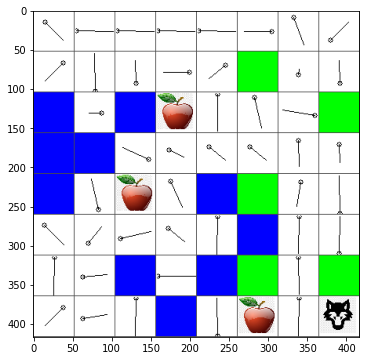

In [43]:
m.plot(Q)

## नीति की जांच करना

चूंकि Q-Table प्रत्येक स्थिति में प्रत्येक क्रिया की "आकर्षकता" को सूचीबद्ध करता है, इसलिए इसका उपयोग करके हमारे संसार में कुशल नेविगेशन को परिभाषित करना काफी आसान है। सबसे सरल स्थिति में, हम बस उस क्रिया का चयन कर सकते हैं जो Q-Table में सबसे उच्च मान से संबंधित हो:


In [13]:
# code block 9

2

यदि आप ऊपर दिए गए कोड को कई बार आज़माते हैं, तो आप देख सकते हैं कि कभी-कभी यह बस "अटक" जाता है, और आपको इसे रोकने के लिए नोटबुक में STOP बटन दबाना पड़ता है। 

> **कार्य 1:** `walk` फ़ंक्शन को संशोधित करें ताकि यह पथ की अधिकतम लंबाई को एक निश्चित संख्या के चरणों (जैसे, 100) तक सीमित कर सके, और ऊपर दिया गया कोड समय-समय पर इस मान को लौटाए।

> **कार्य 2:** `walk` फ़ंक्शन को संशोधित करें ताकि यह उन स्थानों पर वापस न जाए जहाँ यह पहले ही जा चुका है। यह `walk` को लूपिंग से रोकेगा, लेकिन फिर भी एजेंट ऐसी स्थिति में "फँस" सकता है जहाँ से वह बाहर नहीं निकल सकता।


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


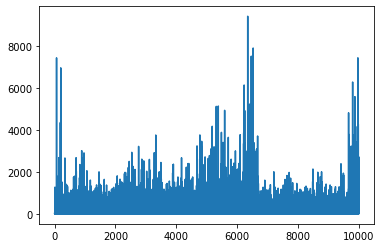

In [57]:
plt.plot(lpath)

## अभ्यास  
## एक अधिक यथार्थवादी पीटर और भेड़िया की दुनिया  



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता के लिए प्रयासरत हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को आधिकारिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।  
